# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### a) Determine Business Objectives

<i> Used car dealerships need to be able to build good quality inventory and be able to sell them within quick time at a good prices to achieve maximum profitability. To achieve this, dealers should be able to identify the right price point for a used car that needs to be sold - the price is determined by a large number of factors and pricing it higher or lower would lead to the car remaining unsold for longer time periods or less to reduced profitability respectively. <br><br>
Hence it is important to identify the key factors that can be used to not only determine the right price point for a particular car, but also help customers understand the reasons behind the pricing increasing the chances of sale </i>


#### b) Outline Goals for the Project

<i> The goal for the project is to analyze available data of previous used car transactions, exploring the various features that were captured. Once done, identify the key features using a regression model that can help the used car dealer estimate the right price point for any used car </i>

#### c) Project Plan

<i> The key steps for the project are:<br>
a) Review the data containing past transactions and explore potential quality issues <br>
b) Prepare the data for further analysis (e.g. removing unwanted columns, replace missing values, normalize columns as needed etc.) <br>
c) Conduct regression analysis on the prepared data and identify key fields / features that can help determine price for a used car as accurately as possible <br>

### Data Understanding

After gaining an understanding of the business requirement, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Step 0: Import required libraries for the project

In [1]:
#Importing libraries needed for the practical application assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold


#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.feature_selection import RFE
#from sklearn.inspection import permutation_importance
#from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
#from sklearn.model_selection import train_test_split, KFold, GridSearchCV
#from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, ARDRegression, BayesianRidge
#from sklearn.kernel_ridge import KernelRidge 
#from sklearn.datasets import make_regression
#from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
#import io

#import scipy as sp
#%matplotlib inline

#### Step 1: Collect and Load Data

In [2]:
df_sourceData = pd.read_csv("data/vehicles.csv")

In [3]:
df_sourceData.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### Step 2: Describe the data

In [4]:
#Step 2a: Review the schema
df_sourceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

<i> From the above we can make the below initial inferences:<br>
a) There are 18 columns and 426,880 rows / entries <br>
b) 14 out of the 18 columns may have missing values based on the number of non-null entries for each field </i>

---

In [5]:
#Step 2b: Describe the data
df_sourceData.describe().map('{:,.2f}'.format)

,id,price,year,odometer
count,"426,880.00","426,880.00","425,675.00","422,480.00"
mean,"7,311,486,634.22","75,199.03","2,011.24","98,043.33"
std,"4,473,170.41","12,182,282.17",9.45,"213,881.50"
min,"7,207,408,119.00",0.00,"1,900.00",0.00
25%,"7,308,143,339.25","5,900.00","2,008.00","37,704.00"
50%,"7,312,620,821.00","13,950.00","2,013.00","85,548.00"
75%,"7,315,253,543.50","26,485.75","2,017.00","133,542.50"
max,"7,317,101,084.00","3,736,928,711.00","2,022.00","10,000,000.00"


<i> It is interesting to note that the maximum price is $3.73B which maybe an incorrect outlier. Similarly the maximum odometer reading of 10M may not be possible as well. Our data preparation exercise needs to address these outliers effectively so that they don't skew the resulting analysis </i>

---

#### Step 3: Explore Data (Check for Potential Quality Issues)

##### <u>3a) Review the number of Null values in each field</u>

In [6]:
# 3a) Review the number of Null values in each field
sourceData_nullCounts = df_sourceData.isnull().sum(axis=0)
sourceData_nullCount_pct = sourceData_nullCounts / len(df_sourceData)
pd.DataFrame({'Null Count': sourceData_nullCounts,'Null Count %': sourceData_nullCount_pct}).sort_values('Null Count %',ascending=False)

,Null Count,Null Count %
size,306361,0.717675
cylinders,177678,0.416225
condition,174104,0.407852
VIN,161042,0.377254
drive,130567,0.305863
paint_color,130203,0.305011
type,92858,0.217527
manufacturer,17646,0.041337
title_status,8242,0.019308
model,5277,0.012362


<i>Since we have certain fields with a significant number of missing values (e.g. Size has 71% of its values missing, Cylinders has 42.6% of its values missing, Condition has 40% of its values missing etc.). This would have to be addressed during the data preparation phase.</i>

------------------

##### <u>3b) Check if the dataset has any duplicate values</u>

In [7]:
# 3b) Check if the dataset has any duplicate values
duplicate_rows = df_sourceData[df_sourceData.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, state]
Index: []


<i>The dataset does not have any duplicate records.</i>

--------

In [8]:
#Count the number of unique values in id and VIN columns since they could potentially be unique identifiers
print(df_sourceData['id'].nunique())
print(df_sourceData['VIN'].nunique())

426880
118246


<i> ID only has unique values in the dataset - hence it is not suitable to make recommendations / predictions on the pricing of a particular car. Hence it can be ignored in our analysis </i><br>

---

##### <u>3c) Review the object fields </u>

In [9]:
# 3c) Review the object fields
df_fieldValueCounts = df_sourceData.select_dtypes(exclude=['int', 'float'])
for col in df_fieldValueCounts.columns:
    print(df_fieldValueCounts[col].value_counts()) # to print count of every category
    print ('\n--------------------\n')

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

--------------------

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti        

<i>From the above output, certain trends can be observed:<br>
a) The same VIN occurs multiple times even though there are no duplicate records - this could mean that the same car was resold multiple times. This would have to be revisited further before being used for further analysis since VIN is unique for each car - having the same VIN coming in 200+ times for some cases indicate it should not be used for modeling<br>
b) Region and model have many unique values (404 and 29,649 respectively) - this could potentially add noise to the analysis</i>

---


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Step 1: Select Data - Remove columns that are not needed for analysis

<i>Based on the findings from the data collection exercise, the below columns will not be used for further analysis: <br>
a) 'id': ID only has unique values to identify each record and does not provide any information to predict the price of a car - hence it can be ignored for further analysis<br>
b) 'VIN': VIN is also a unique car identifier and does not provide information to predict the price of a car - hence it can be ignored for further analysis<br>
c) 'Size': Only 30% of the records have values for size - hence this can be dropped<br>
d) 'Model': Since Model has a large variety of values (29,000+) it would be difficult to use it for predictions. Moreover there is a high possibility of the same model coming in as multiple values (e.g. we see both Silverado and Silverado 1500 - some of the entries with Silverado as the value could actually be Silverado 1500 as well)
</i>

---

In [10]:
# Removing 'id','VIN', 'size' and 'model' features
df_sourceDataUpdated = df_sourceData.drop(columns=['id','VIN','size','model'], axis=1)
#Since the unique value column 'id' is bring dropped, calling reset_index to reset the index of the data frame
df_sourceDataUpdated.reset_index(inplace=True, drop = True)
df_sourceDataUpdated

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


#### Step 2: Clean Data

##### <u>2a) Identify and Address Potential Outliers</u>

<i> In the previous we observed that the columns 'price' and 'odometer' could potentially have outliers. Hence we can analyze these 2 columns using a box plot </i><br>

###### <b><u>Outlier Analysis for Price Column</u></b>

<Axes: title={'center': 'Box Plot for Price Column'}>

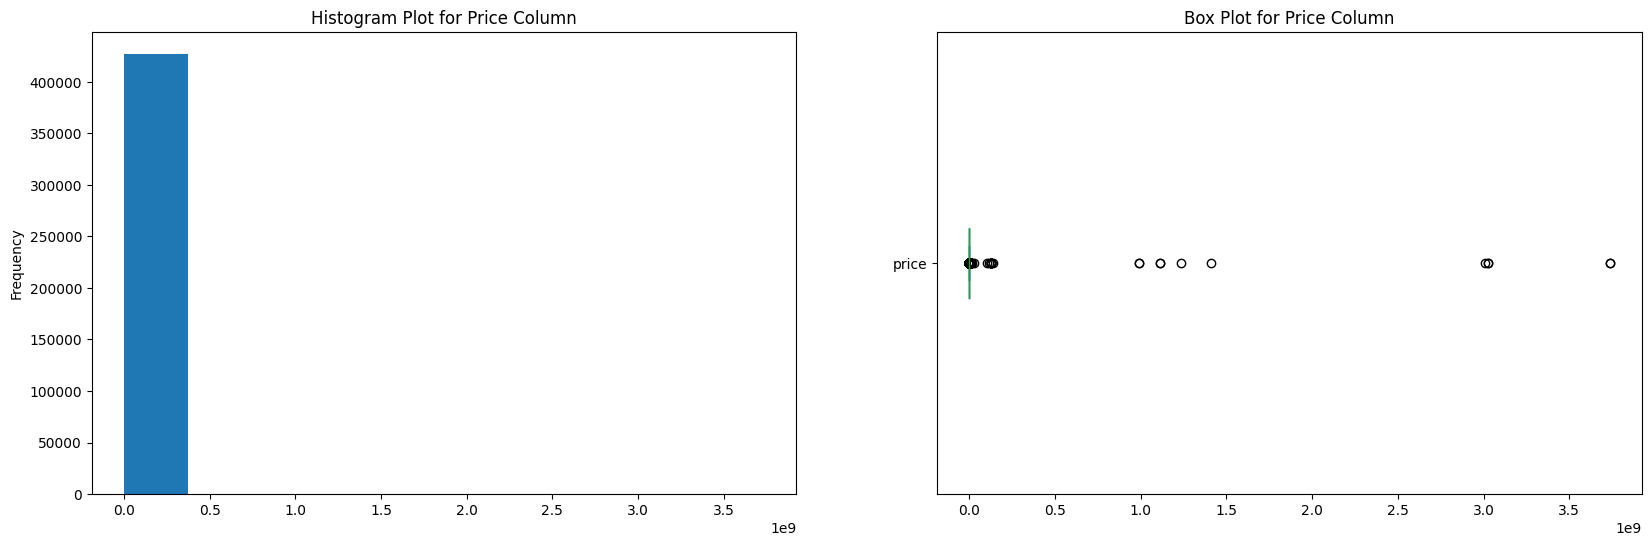

In [11]:
#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['price'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Price Column')
#Create a box plot
df_sourceDataUpdated['price'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Price Column')

In [12]:
#Print key statistics of the Price column
print('Mean:', df_sourceDataUpdated['price'].mean())
print('Median:', df_sourceDataUpdated['price'].median())
print('Std. Deviation:', df_sourceDataUpdated['price'].std())
print('Max:', df_sourceDataUpdated['price'].max())
print('Min:', df_sourceDataUpdated['price'].min())

Mean: 75199.0331873126
Median: 13950.0
Std. Deviation: 12182282.173597954
Max: 3736928711
Min: 0


<br><i> The above 2 plots and the fact that mean is much higher than the median indicates that the distribution of price column is right skewed - one reason why this could be happening is due to the presence of some very large outliers coupled with a significant number of zero values, which makes the mean skew towards the right. <br>
To addres this, the z-score approach can be used where entries not falling between -3 and 3 are discarded

In [13]:
#Calculate the z-score for Price and add it as a column
df_sourceDataUpdated['zscore_Price'] = (df_sourceDataUpdated['price'] - df_sourceDataUpdated['price'].mean())/(df_sourceDataUpdated['price'].std())
#Retain only those values that has an absolute z-score value of 3 or less
df_sourceDataUpdated = df_sourceDataUpdated[df_sourceDataUpdated['zscore_Price'].abs() <= 3].drop('zscore_Price',axis=1)
df_sourceDataUpdated.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


<Axes: title={'center': 'Box Plot for Price Column'}>

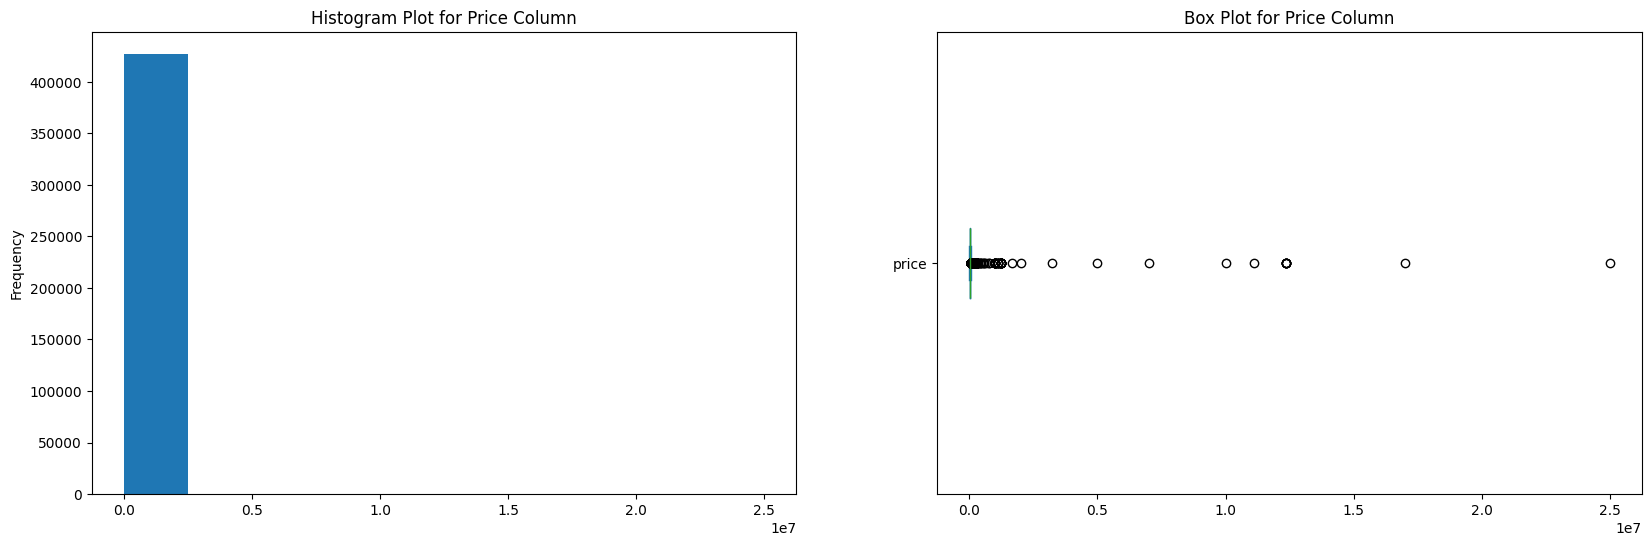

In [14]:
#Reproducing graphs to review distribution of price column post changes

#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['price'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Price Column')
#Create a box plot
df_sourceDataUpdated['price'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Price Column')

<i>With the outliers excluded, the pricing column distribution looks much better (even though it does not follow a normal distribution) - this could be a potential candidate for further regression analysis. However, we could try execuring the z-score on pricing again to see if the long tail on the right can be reduced.</i>


<Axes: title={'center': 'Box Plot for Price Column'}>

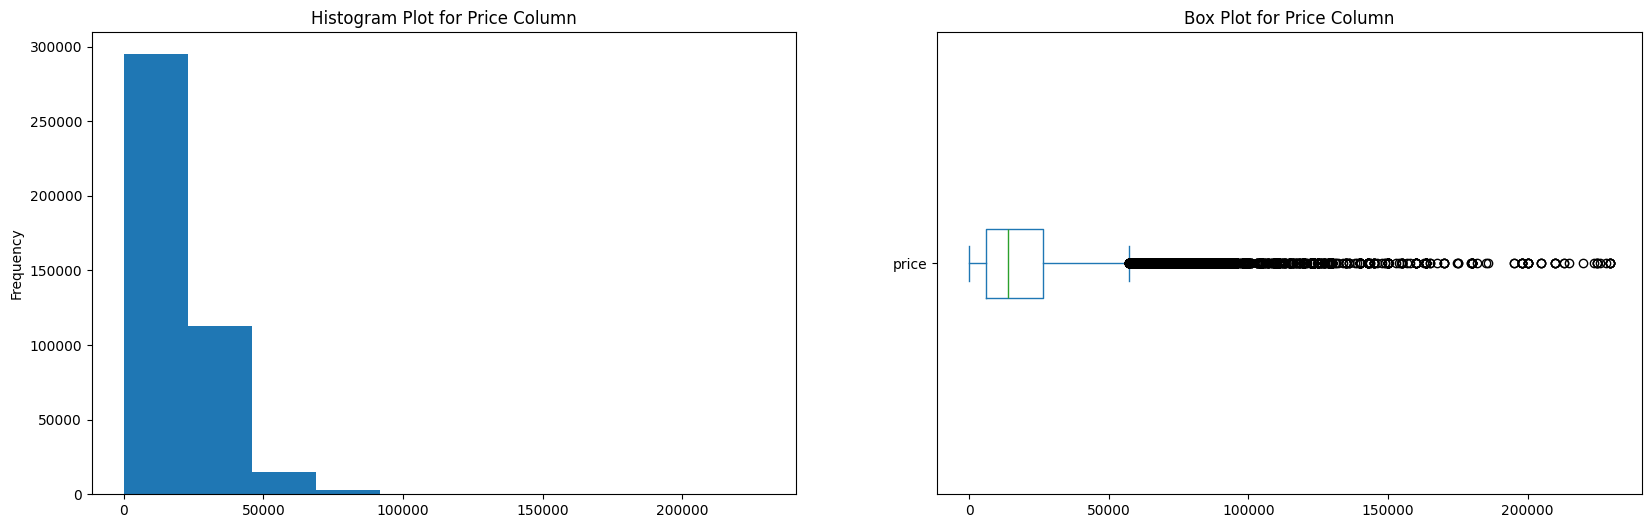

In [15]:
#Calculate the z-score for Price and add it as a column
df_sourceDataUpdated['zscore_Price'] = (df_sourceDataUpdated['price'] - df_sourceDataUpdated['price'].mean())/(df_sourceDataUpdated['price'].std())
#Retain only those values that has an absolute z-score value of 3 or less
df_sourceDataUpdated = df_sourceDataUpdated[df_sourceDataUpdated['zscore_Price'].abs() < 3].drop('zscore_Price',axis=1)
df_sourceDataUpdated.head()

#Reproducing graphs to review distribution of price column post changes

#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['price'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Price Column')
#Create a box plot
df_sourceDataUpdated['price'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Price Column')

<Axes: title={'center': 'Box Plot for Price Column'}>

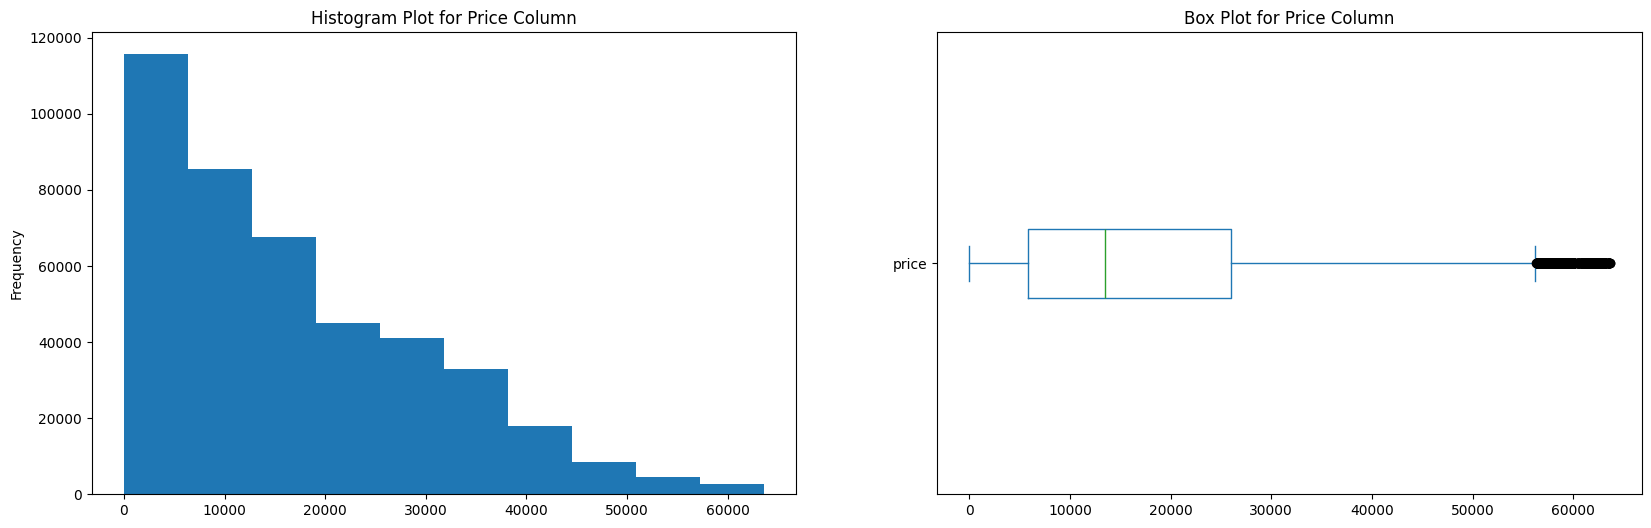

In [16]:
#Calculate the z-score for Price and add it as a column
df_sourceDataUpdated['zscore_Price'] = (df_sourceDataUpdated['price'] - df_sourceDataUpdated['price'].mean())/(df_sourceDataUpdated['price'].std())
#Retain only those values that has an absolute z-score value of 3 or less
df_sourceDataUpdated = df_sourceDataUpdated[df_sourceDataUpdated['zscore_Price'].abs() < 3].drop('zscore_Price',axis=1)
df_sourceDataUpdated.head()

#Reproducing graphs to review distribution of price column post changes

#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['price'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Price Column')
#Create a box plot
df_sourceDataUpdated['price'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Price Column')

---

###### <b><u> Outlier Analysis for Odometer Column </u></b><br>
<i> We do a similar analysis for odometer readings as well since the previous section indicated the column having outliers </i>

<Axes: title={'center': 'Box Plot for Odometer Column'}>

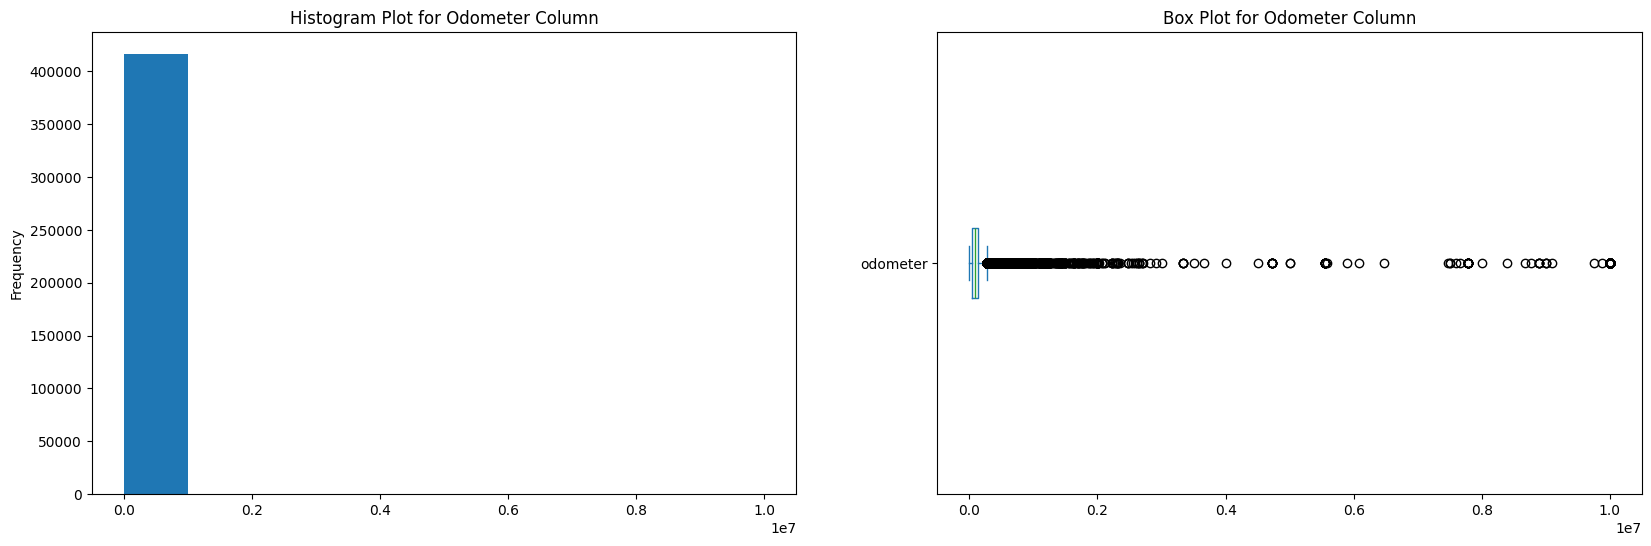

In [17]:
#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['odometer'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Odometer Column')
#Create a box plot
df_sourceDataUpdated['odometer'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Odometer Column')

In [18]:
#Print key statistics of the Odometer column
print('Mean:', df_sourceDataUpdated['odometer'].mean())
print('Median:', df_sourceDataUpdated['odometer'].median())
print('Std. Deviation:', df_sourceDataUpdated['odometer'].std())
print('Max:', df_sourceDataUpdated['odometer'].max())
print('Min:', df_sourceDataUpdated['odometer'].min())

Mean: 98824.02882863008
Median: 86736.5
Std. Deviation: 214408.54520843647
Max: 10000000.0
Min: 0.0


<br><i> While the difference between mean and median is not as pronounced as the price column, there is still an opportunity to make this column more suitable for futher analysis by removing outliers. The z-score approach can be used here as well </i>

In [19]:
#Calculate the z-score for Price and add it as a column
df_sourceDataUpdated['zscore_odometer'] = (df_sourceDataUpdated['odometer'] - df_sourceDataUpdated['odometer'].mean())/(df_sourceDataUpdated['odometer'].std())
#Retain only those values that has an absolute z-score value of 3 or less
df_sourceDataUpdated = df_sourceDataUpdated[df_sourceDataUpdated['zscore_odometer'].abs() < 3].drop('zscore_odometer',axis=1)
df_sourceDataUpdated.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


<Axes: title={'center': 'Box Plot for Odometer Column'}>

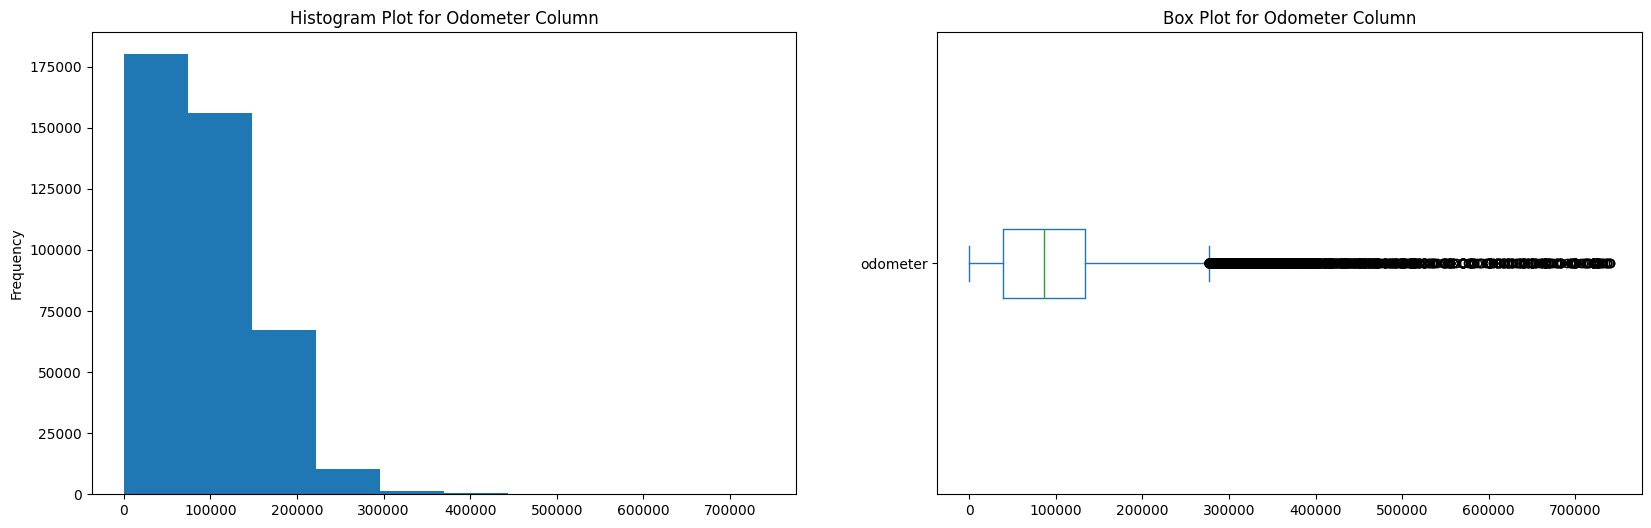

In [20]:
#Reproducing graphs to review distribution of odometer column post changes

#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['odometer'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Odometer Column')
#Create a box plot
df_sourceDataUpdated['odometer'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Odometer Column')

The odometer column also looks much cleaner for further analysis. Running z-score one more time to see if the long tail can be optimized.

<Axes: title={'center': 'Box Plot for Odometer Column'}>

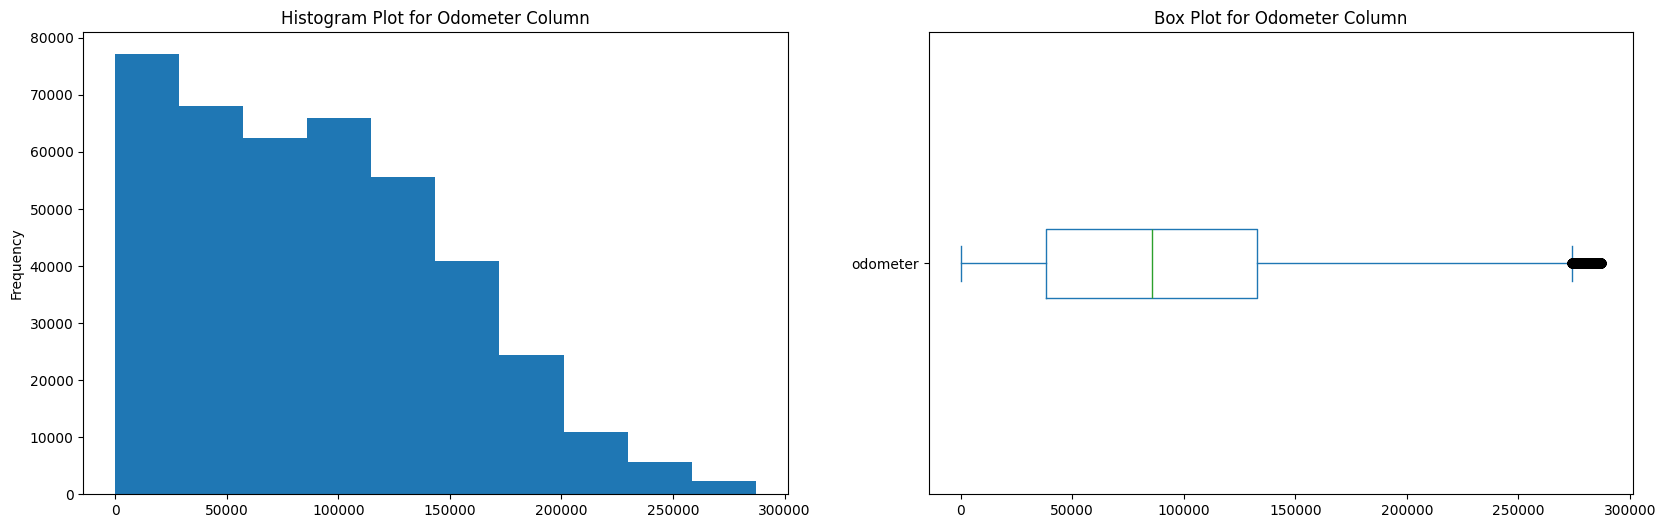

In [21]:
#Calculate the z-score for Price and add it as a column
df_sourceDataUpdated['zscore_odometer'] = (df_sourceDataUpdated['odometer'] - df_sourceDataUpdated['odometer'].mean())/(df_sourceDataUpdated['odometer'].std())
#Retain only those values that has an absolute z-score value of 3 or less
df_sourceDataUpdated = df_sourceDataUpdated[df_sourceDataUpdated['zscore_odometer'].abs() < 3].drop('zscore_odometer',axis=1)
df_sourceDataUpdated.head()

#Reproducing graphs to review distribution of odometer column post changes

#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['odometer'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Odometer Column')
#Create a box plot
df_sourceDataUpdated['odometer'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Odometer Column')

---

###### <b><u>Year Column</u></b><br>
<i> Since year is the only numerical column remaining, we can review this column and identify opportunities if any to remove outliers</i>

<Axes: title={'center': 'Box Plot for Year Column'}>

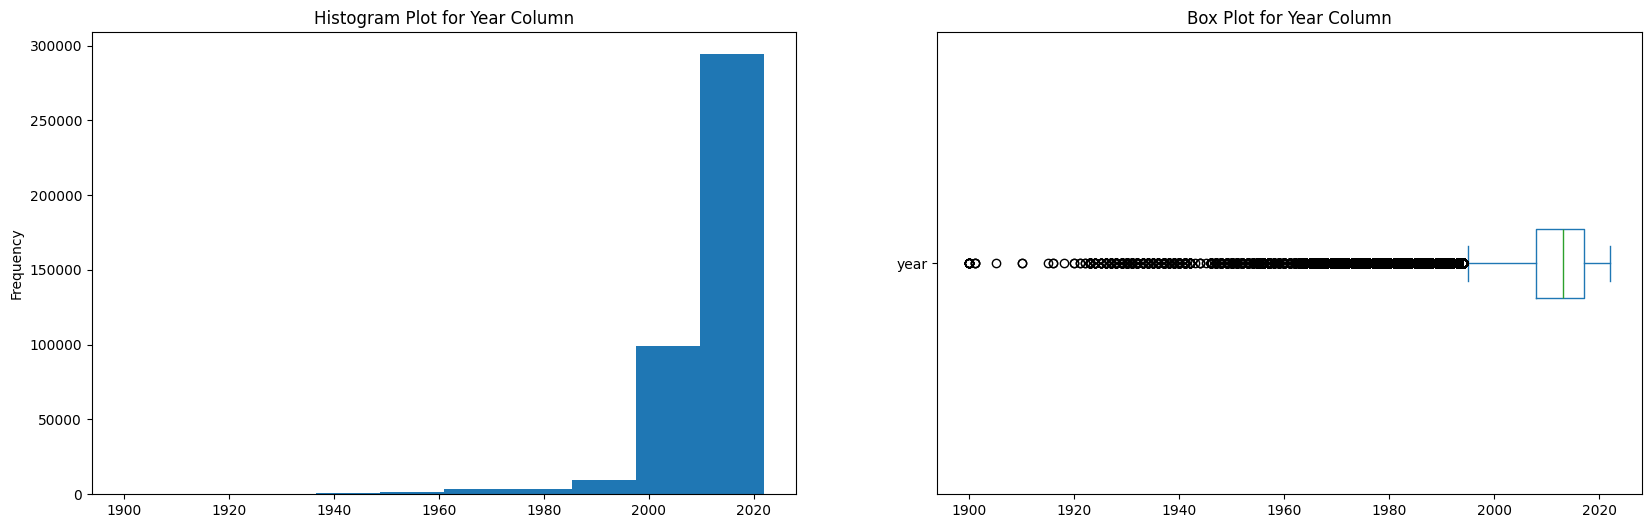

In [22]:
#Review distribution of price column post changes

#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['year'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Year Column')
#Create a box plot
df_sourceDataUpdated['year'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Year Column')

In [23]:
#Print key statistics of the Year column
print('Mean:', df_sourceDataUpdated['year'].mean())
print('Median:', df_sourceDataUpdated['year'].median())
print('Std. Deviation:', df_sourceDataUpdated['year'].std())
print('Max:', df_sourceDataUpdated['year'].max())
print('Min:', df_sourceDataUpdated['year'].min())

Mean: 2011.2726082021131
Median: 2013.0
Std. Deviation: 9.29112623890663
Max: 2022.0
Min: 1900.0


<i> While the year graph has a lot of values to the right (which is expected since there may not be enough number of older cars to sell), it might be worth removing outliers to the left since extremely old cars may not provide enough data to make recommendations. Conducting similar z-score analysis done for year and odometer columns for year as well below. </i>

In [24]:
#Calculate the z-score for Price and add it as a column
df_sourceDataUpdated['zscore_year'] = (df_sourceDataUpdated['year'] - df_sourceDataUpdated['year'].mean())/(df_sourceDataUpdated['year'].std())
#Retain only those values that has an absolute z-score value of 3 or less
df_sourceDataUpdated = df_sourceDataUpdated[df_sourceDataUpdated['zscore_year'].abs() < 3].drop('zscore_year',axis=1)
df_sourceDataUpdated.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


<Axes: title={'center': 'Box Plot for Year Column'}>

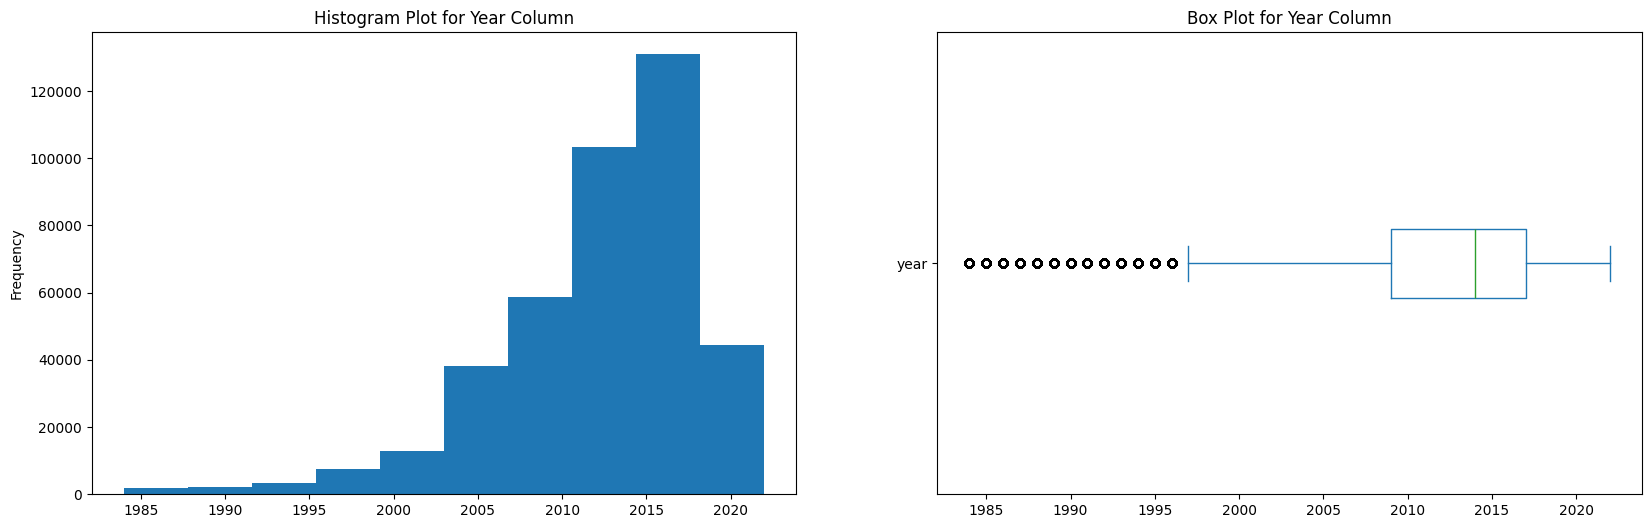

In [25]:
#Reproducing graphs to review distribution of price column post changes

#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['year'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Year Column')
#Create a box plot
df_sourceDataUpdated['year'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Year Column')

<Axes: title={'center': 'Box Plot for Year Column'}>

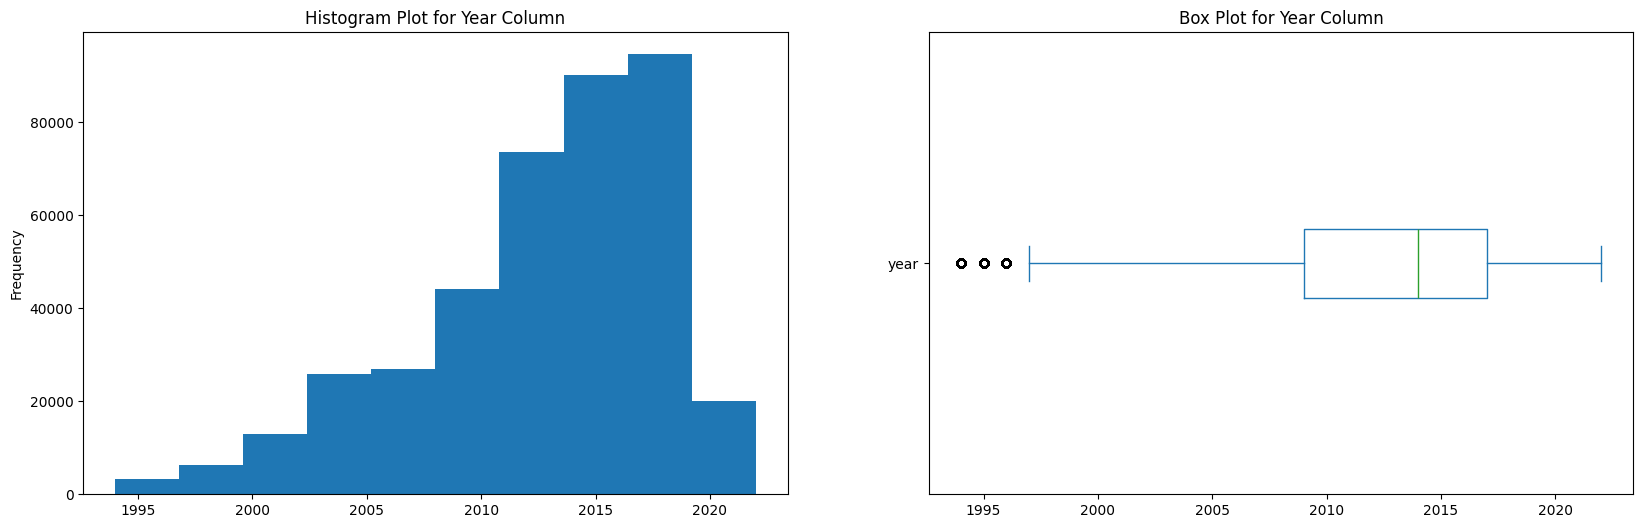

In [26]:
#Running z-score one more team to see if the long tail on left can be optimized
#Calculate the z-score for Price and add it as a column
df_sourceDataUpdated['zscore_year'] = (df_sourceDataUpdated['year'] - df_sourceDataUpdated['year'].mean())/(df_sourceDataUpdated['year'].std())
#Retain only those values that has an absolute z-score value of 3 or less
df_sourceDataUpdated = df_sourceDataUpdated[df_sourceDataUpdated['zscore_year'].abs() < 3].drop('zscore_year',axis=1)
df_sourceDataUpdated.head()

#Reproducing graphs to review distribution of price column post changes

#Creating a subplot to allow 2 charts be printed side by side
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
#Create a histogram plot
df_sourceDataUpdated['year'].plot(ax = axes[0],kind = 'hist',title='Histogram Plot for Year Column')
#Create a box plot
df_sourceDataUpdated['year'].plot(ax = axes[1],kind = 'box',vert=False,title='Box Plot for Year Column')

#### Step 3: Address Missing Values in the Source Data

In [27]:
#Review the number of missing values in the updated data set post removal of outliers
sourceData_nullCounts = df_sourceDataUpdated.isnull().sum(axis=0)
sourceData_nullCount_pct = sourceData_nullCounts / len(df_sourceDataUpdated)
pd.DataFrame({'Null Count': sourceData_nullCounts,'Null Count %': sourceData_nullCount_pct}).sort_values('Null Count %',ascending=False)

,Null Count,Null Count %
cylinders,166328,0.417691
condition,161785,0.406283
drive,121027,0.303929
paint_color,119878,0.301044
type,83378,0.209383
manufacturer,12580,0.031592
title_status,7170,0.018006
fuel,2133,0.005356
transmission,1620,0.004068
region,0,0.000000


<i> Even after dropping unwanted columns and removing outliers, the proportion of missing values in the columns 'cylinders' and 'condition' is still very close to their original values (42.6% and 40.7% respectively). A few other categorical variables also have signficant volume of missing data ('drive', 'paint_color' and 'type'). The 3 numerical values ('year','price' and 'odometer') now don't have missing values as well. </i> <br>

<i> Hence we can now proceed to address these missing values. For this we can review the key columns and conduct data imputation </i>

##### <u> 2a) Data Imputation </u>

<i>For columns with low % of null / missing values, we can replace missing values with the most frequent number. As a threshold, all fields with less than 5% values missing can be updated with this approach </i> 

In [28]:
df_sourceData_imputed = df_sourceDataUpdated.copy()
df_sourceData_imputed.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [29]:
#Run SimpleImputer on the columns Transmission, Fuel, Title_Status and Manufacturer

df_sourceData_imputed.fillna({'transmission': df_sourceData_imputed['transmission'].mode()[0]}, inplace=True)
df_sourceData_imputed.fillna({'fuel': df_sourceData_imputed['fuel'].mode()[0]}, inplace=True)
df_sourceData_imputed.fillna({'title_status': df_sourceData_imputed['title_status'].mode()[0]}, inplace=True)
df_sourceData_imputed.fillna({'manufacturer': df_sourceData_imputed['manufacturer'].mode()[0]}, inplace=True)
df_sourceData_imputed.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [30]:
#Checking if the modified columns have mising / null values

In [31]:
sourceData_nullCounts = df_sourceData_imputed.isnull().sum(axis=0)
sourceData_nullCount_pct = sourceData_nullCounts / len(df_sourceData_imputed)
pd.DataFrame({'Null Count': sourceData_nullCounts,'Null Count %': sourceData_nullCount_pct}).sort_values('Null Count %',ascending=False)

,Null Count,Null Count %
cylinders,166328,0.417691
condition,161785,0.406283
drive,121027,0.303929
paint_color,119878,0.301044
type,83378,0.209383
price,0,0.000000
year,0,0.000000
manufacturer,0,0.000000
region,0,0.000000
fuel,0,0.000000


<i>For the remaining columns (Type, Paint Color, Drive, Condition and Cylinders), we can apply the KKN Imputer method since these are categorical columns with a good portion of missing values </i>

In [32]:
#Columns for encoding and applying KKN Impute
columnList = ['type', 'paint_color', 'drive', 'condition', 'cylinders']

df_imputed = df_sourceData_imputed.copy()

#Create an Ordinal Encoder object
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the categorical columns
df_imputed[columnList] = encoder.fit_transform(df_imputed[columnList])

#Create KNNImputer object (because KNNImputer is slow and not producing output, a SimpleImputer has been used for now)
#imputer = KNNImputer(n_neighbors=5, weights = 'uniform')
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Impute the missing values
for col in columnList:
    df_imputed[[col]] = imputer.fit_transform(df_imputed[[col]])

# Inverse transform the imputed data to get original categorical values
df_imputed[columnList] = encoder.inverse_transform(df_imputed[columnList])

#print("Original DataFrame:\n", df_sourceData_imputed)
#print("\nEncoded DataFrame:\n", df_test)
print("\nImputed DataFrame:\n", df_imputed)


Imputed DataFrame:
          region  price    year manufacturer  condition    cylinders    fuel  \
27       auburn  33590  2014.0          gmc       good  8 cylinders     gas   
28       auburn  22590  2010.0    chevrolet       good  8 cylinders     gas   
29       auburn  39590  2020.0    chevrolet       good  8 cylinders     gas   
30       auburn  30990  2017.0       toyota       good  8 cylinders     gas   
31       auburn  15000  2013.0         ford  excellent  6 cylinders     gas   
...         ...    ...     ...          ...        ...          ...     ...   
426875  wyoming  23590  2019.0       nissan       good  6 cylinders     gas   
426876  wyoming  30590  2020.0        volvo       good  6 cylinders     gas   
426877  wyoming  34990  2020.0     cadillac       good  6 cylinders  diesel   
426878  wyoming  28990  2018.0        lexus       good  6 cylinders     gas   
426879  wyoming  30590  2019.0          bmw       good  6 cylinders     gas   

        odometer title_status 

In [33]:
#Confirming if there are any more missing values
df_sourceData_imputed = df_imputed.copy()
sourceData_nullCounts = df_sourceData_imputed.isnull().sum(axis=0)
sourceData_nullCount_pct = sourceData_nullCounts / len(df_sourceData_imputed)
pd.DataFrame({'Null Count': sourceData_nullCounts,'Null Count %': sourceData_nullCount_pct}).sort_values('Null Count %',ascending=False)

,Null Count,Null Count %
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0


<i> Now we have a dataset transformed with no more missing values. In order to make the data set ready for modeling through regression, the categorical data needs to be encoded </i>


In [34]:
columnList = ['type', 'paint_color', 'drive', 'condition', 'cylinders','region','manufacturer','fuel','title_status','transmission','state']

df_encodedData = df_sourceData_imputed.copy()
# Apply LabelEncoder to each categorical column

print("######Printing Encoding Mappings#####")
for col in columnList:
    le = LabelEncoder()
    df_encodedData[col] = le.fit_transform(df_encodedData[col])
    print(col)
    print(le.classes_)
    print ("------------------------------")

print("######Printing Encoded Data#####")

print(df_encodedData)

######Printing Encoding Mappings#####
type
['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-van' 'offroad'
 'other' 'pickup' 'sedan' 'truck' 'van' 'wagon']
------------------------------
paint_color
['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'white' 'yellow']
------------------------------
drive
['4wd' 'fwd' 'rwd']
------------------------------
condition
['excellent' 'fair' 'good' 'like new' 'new' 'salvage']
------------------------------
cylinders
['10 cylinders' '12 cylinders' '3 cylinders' '4 cylinders' '5 cylinders'
 '6 cylinders' '8 cylinders' 'other']
------------------------------
region
['SF bay area' 'abilene' 'akron / canton' 'albany' 'albuquerque'
 'altoona-johnstown' 'amarillo' 'ames' 'anchorage / mat-su' 'ann arbor'
 'annapolis' 'appleton-oshkosh-FDL' 'asheville' 'ashtabula' 'athens'
 'atlanta' 'auburn' 'augusta' 'austin' 'bakersfield' 'baltimore'
 'baton rouge' 'battle creek' 'beaumont / port arthur' 'bellingham'
 'bemidji' 'ben

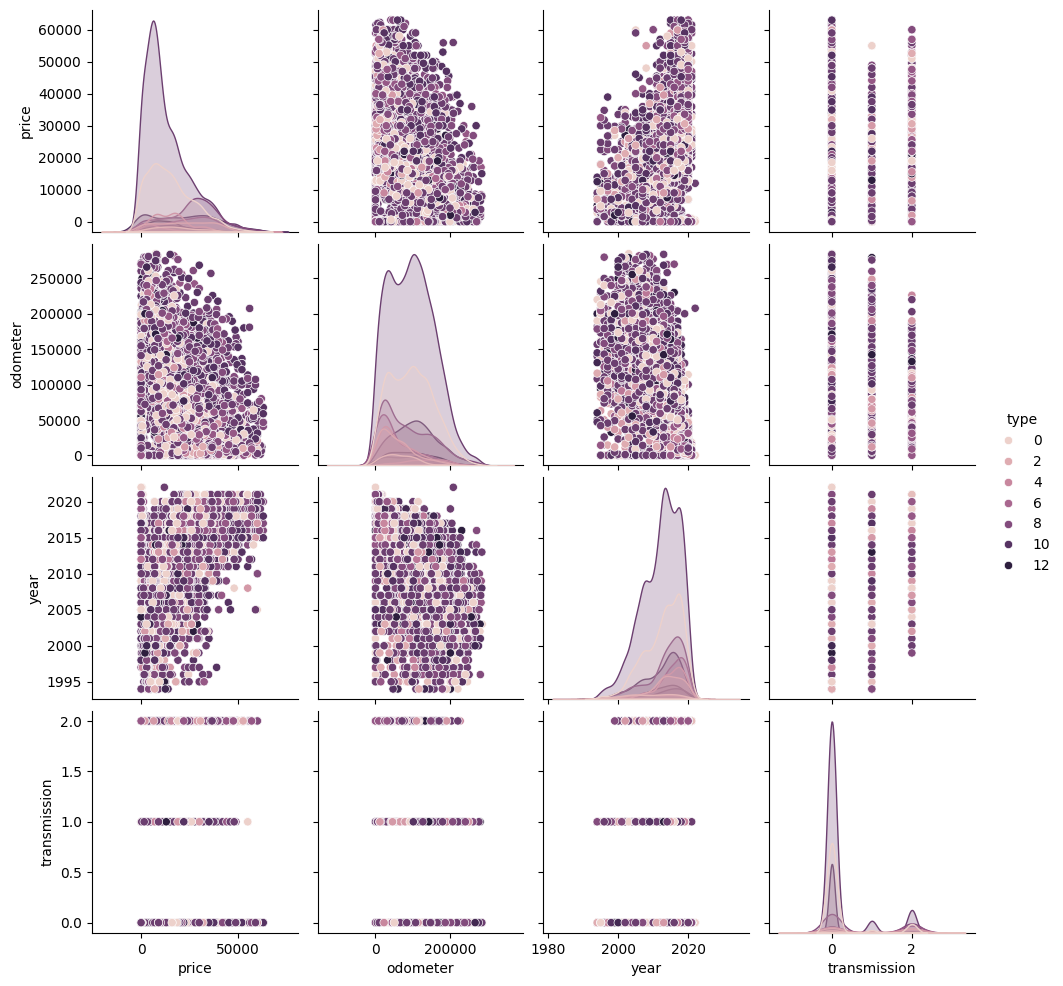

In [35]:
#To check correlation between certain features, we can also do a pair plot
df_SampleData = df_encodedData[['price', 'type','odometer', 'year','transmission']]
df_SampleData = df_SampleData.sample(n = 10000, random_state =1)
sns.pairplot(df_SampleData, hue='type')

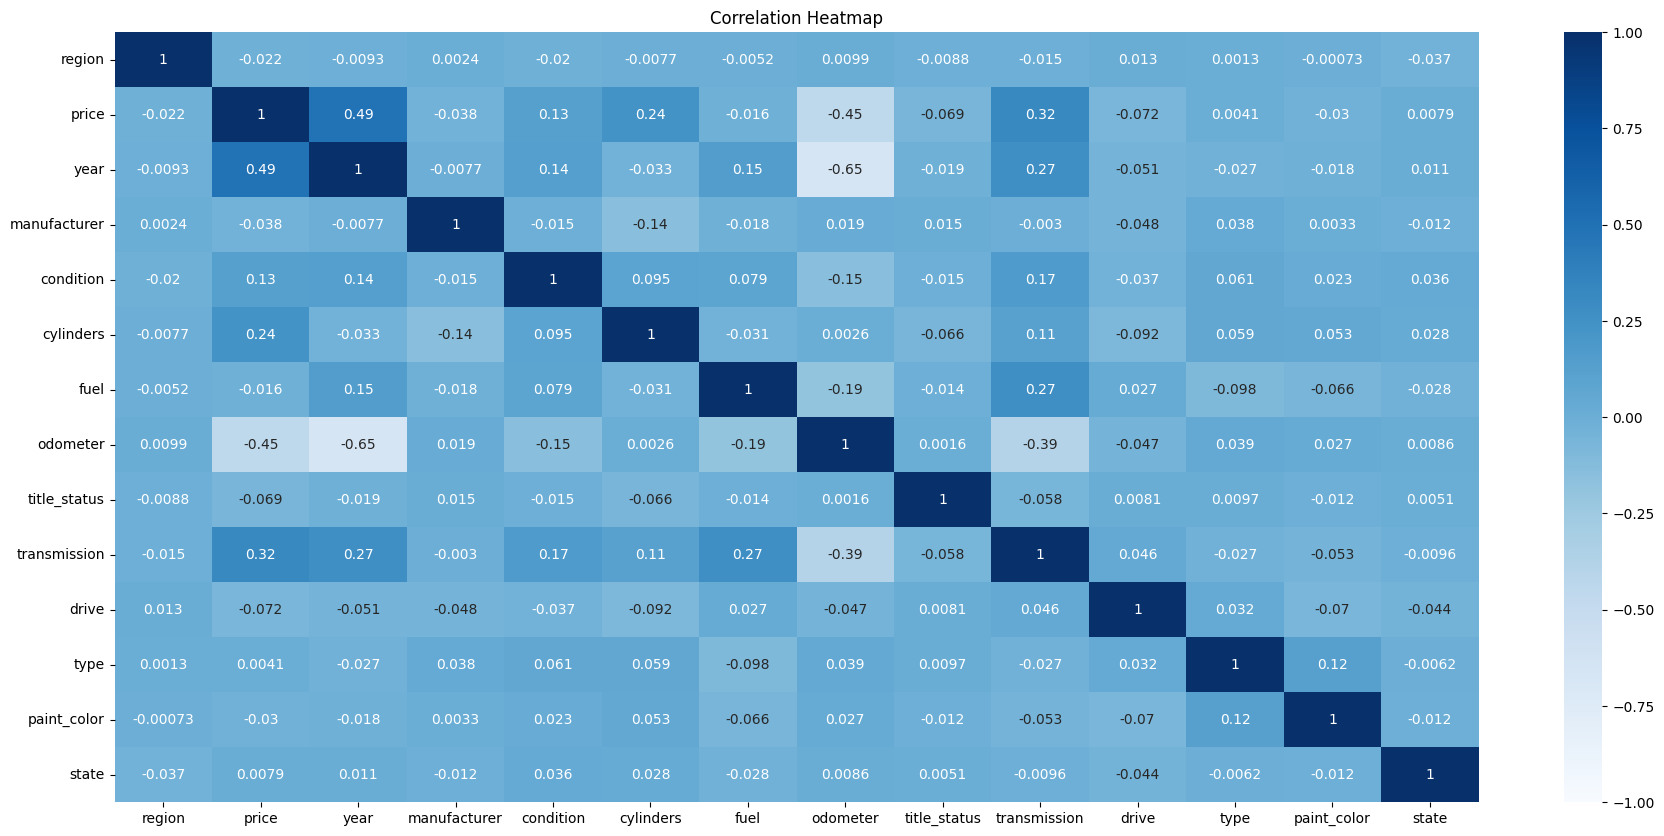

In [36]:
#Checking correlation between different fields by building a correlation heatmap
plt.figure(figsize=(22, 10))
heatmap = sns.heatmap(df_encodedData.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap');

<i> From the above correlation matrix we can already see some insights:<br><br>
a) There is some positive correlation between price and year (0.48) - this makes sense since older cars may sell for less. Since luxury cars may charge higher than economy cars in similar condition, the correlation might be lower than expected<br><br>
b) There is a negative correlation between odometer and year (-0.66) - this is expected as well because older cars would have done more miles. There is a similar negative correlation between odometer and price as well (-0.45) since customers may pay less for cars that have done more miles<br><br>
c) There is some level of negative correlation between transmission and odometer (-0.38) - this could be because manual geat shift cars maybe older and hence may have covered more miles<br>
<br>
We can use these inferences to begin with to build a model

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Step 1: Decide Modeling Techniques

<i> Now that we have transformed the dataset where categorical data is labeled, regression models can be applied on the dataset to determine which features / columns have more impact on price compared to others. <br>
The approach here involves the below:<br>
a) Split our dataset into training and test data - for this project we will train the model on 75% of data and keep the remaining 25% for test<br>
b) Conduct linear regression with the training data and see how it predicts the price on test data<br>
c) Conduct polynomial regression (for 2 and 3 degrees) with the training data and see how it predicts the price on test data
</i>

#### Step 2: Create Test and Training Data

In [37]:
#Prep step: Prepare training and test dataset

#Drop price from the feature dataset
X = df_encodedData.drop(columns = ['price'])
#Create the Y dataset (price values)
Y = df_encodedData['price']
#Prepare the training and test datasets - assuming 25% of the data would be used to do tests
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42, shuffle=True)
X_train


,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
372820,96,2019.0,12,2,5,4,12049.0,0,2,2,2,0,43
148886,347,2009.0,38,0,3,2,197000.0,0,0,1,9,8,14
377217,170,2013.0,13,2,6,2,37888.0,0,2,0,8,9,43
383665,370,2017.0,12,2,5,2,76195.0,0,0,0,9,8,43
42822,258,2015.0,32,2,5,2,68239.0,0,2,0,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277783,272,2013.0,36,2,5,2,64467.0,0,0,0,0,10,34
391916,136,2020.0,17,2,5,2,6500.0,0,0,0,7,1,45
142315,56,1998.0,38,0,5,2,192000.0,0,0,0,9,10,14
158129,81,1997.0,7,0,6,2,240885.0,0,0,0,0,10,12


#### Step 3: Build Models

##### <u>Step 3a: Conduct Linear Regression</u>

In [38]:
#Conduct linear regression

#Create a linear regression pipeline. StandardScaler has been used here to scale data and reduce bias
linearPipe =  Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])

#Peform linear regression with the training data
linearPipe.fit(X_train,Y_train)
#See how the model predicts on training data
yPredict_Training = linearPipe.predict(X_train)
#See how the model predicts on test data
yPredict_Test = linearPipe.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(yPredict_Training, Y_train)
maeTraining = mean_absolute_error(yPredict_Training, Y_train)

#Calculate regression error metrics on test data
mseTest = mean_squared_error(yPredict_Test, Y_test)
maeTest = mean_absolute_error(yPredict_Test, Y_test)

#Print regression error values
print ("******* Linear Regression Results *********")
print ("Training:")
print(f"MSE={mseTraining}, MAE={maeTraining}")
print ("Test:")
print(f"MSE={mseTest}, MAE={maeTest}")
print(f"Coefficent of Determination (Training): {linearPipe.score(X_train, Y_train)}")
print(f"Coefficent of Determination (Test): {linearPipe.score(X_test, Y_test)}")
print ("*******************************************")




******* Linear Regression Results *********
Training:
MSE=115636018.29930973, MAE=7792.687176477777
Test:
MSE=115500506.29267888, MAE=7786.762733043589
Coefficent of Determination (Training): 0.37011873023225617
Coefficent of Determination (Test): 0.37122999263669376
*******************************************


##### <u>Step 3b: Conduct Polynomial Degree 2 Regression</u>

In [39]:
#Conduct Polynomal (degree 2) regression

#To create a polynomial regression pipeline, we add a step after data scaling to transform the dataset 
#for including degree 2 features
polynomialPipe =  Pipeline([('scaler', StandardScaler()),
                            ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                            ('linear', LinearRegression())])

#Peform linear regression with the training data
polynomialPipe.fit(X_train,Y_train)
#See how the model predicts on training data
yPredict_Training = polynomialPipe.predict(X_train)
#See how the model predicts on test data
yPredict_Test = polynomialPipe.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(yPredict_Training, Y_train)
maeTraining = mean_absolute_error(yPredict_Training, Y_train)

#Calculate regression error metrics on test data
mseTest = mean_squared_error(yPredict_Test, Y_test)
maeTest = mean_absolute_error(yPredict_Test, Y_test)

#Print regression error values
print ("******* Polynomail (Degree 2) Regression Results *********")
print ("Training:")
print(f"MSE={mseTraining}, MAE={maeTraining}")
print ("Test:")
print(f"MSE={mseTest}, MAE={maeTest}")
print(f"Coefficent of Determination (Training): {polynomialPipe.score(X_train, Y_train)}")
print(f"Coefficent of Determination (Test): {polynomialPipe.score(X_test, Y_test)}")
print ("*******************************************")


******* Polynomail (Degree 2) Regression Results *********
Training:
MSE=100293048.94640446, MAE=6945.12462706223
Test:
MSE=100012646.53333844, MAE=6944.306159888808
Coefficent of Determination (Training): 0.4536934603219832
Coefficent of Determination (Test): 0.45554392343666306
*******************************************


In [40]:
##### <u>Step 3c: Conduct Polynomial Degree 3 Regression</u>

In [41]:
#Conduct Polynomal (degree 3) regression

#To create a polynomial regression pipeline, we add a step after data scaling to transform the dataset 
#for including degree 3 features
polynomialPipe =  Pipeline([('scaler', StandardScaler()),
                            ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                            ('linear', LinearRegression())])

#Peform linear regression with the training data
poly3Fit = polynomialPipe.fit(X_train,Y_train)
#See how the model predicts on training data
yPredict_Training = polynomialPipe.predict(X_train)
#See how the model predicts on test data
yPredict_Test = polynomialPipe.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(yPredict_Training, Y_train)
maeTraining = mean_absolute_error(yPredict_Training, Y_train)

#Calculate regression error metrics on test data
mseTest = mean_squared_error(yPredict_Test, Y_test)
maeTest = mean_absolute_error(yPredict_Test, Y_test)

#Print regression error values
print ("******* Polynomail (Degree 3) Regression Results *********")
print ("Training:")
print(f"MSE={mseTraining}, MAE={maeTraining}")
print ("Test:")
print(f"MSE={mseTest}, MAE={maeTest}")
print(f"Coefficent of Determination (Training): {polynomialPipe.score(X_train, Y_train)}")
print(f"Coefficent of Determination (Test): {polynomialPipe.score(X_test, Y_test)}")
print ("*******************************************")

******* Polynomail (Degree 3) Regression Results *********
Training:
MSE=93492459.02894399, MAE=6646.780198224965
Test:
MSE=93665046.60541616, MAE=6652.750323467721
Coefficent of Determination (Training): 0.49073697215661094
Coefficent of Determination (Test): 0.4900994468843728
*******************************************


<i> There is a marginal increase in the determination coefficient from degree 2 to degree 3 polynomial regression. Since degrees beyond 3 may be computationally intenstive, we can stop at degree 3 </i> 

In [42]:
#Conduct L1 regularization

#To create a polynomial regression pipeline, we add a step after data scaling to transform the dataset 
#for including degree 3 features
polynomialPipeLasso =  Pipeline([('scaler', StandardScaler()),
                            ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                            ('lasso', Lasso(alpha = 0.5,selection='random',random_state=42))])

#Peform linear regression with the training data
polynomialPipeLasso.fit(X_train,Y_train)
#See how the model predicts on training data
yPredict_Training = polynomialPipeLasso.predict(X_train)
#See how the model predicts on test data
yPredict_Test = polynomialPipeLasso.predict(X_test)

#Calculate regression error metrics on training data
mseTraining = mean_squared_error(yPredict_Training, Y_train)
maeTraining = mean_absolute_error(yPredict_Training, Y_train)

#Calculate regression error metrics on test data
mseTest = mean_squared_error(yPredict_Test, Y_test)
maeTest = mean_absolute_error(yPredict_Test, Y_test)

#Print regression error values
print ("******* Polynomail (Degree 3) Regression Results *********")
print ("Training:")
print(f"MSE={mseTraining}, MAE={maeTraining}")
print ("Test:")
print(f"MSE={mseTest}, MAE={maeTest}")
print(f"Coefficent of Determination (Training): {polynomialPipeLasso.score(X_train, Y_train)}")
print(f"Coefficent of Determination (Test): {polynomialPipeLasso.score(X_test, Y_test)}")
print ("*******************************************")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 4.386e+09
  model = cd_fast.enet_coordinate_descent(


******* Polynomail (Degree 3) Regression Results *********
Training:
MSE=93502030.15874365, MAE=6645.379004461658
Test:
MSE=93666781.61011772, MAE=6650.963254366614
Coefficent of Determination (Training): 0.4906848372294491
Coefficent of Determination (Test): 0.4900900017403298
*******************************************


<i> There is no sigficant improvemement achieved with Lasso regression (L1 regularization) for polynomail degree 3 regression when compared to linear. </i> 

#### Step 4: Review Coefficients of the Chosen Model

In [43]:
coefs_Polynomial3 = pd.DataFrame(
    poly3Fit[-1].coef_,
    columns=["Coefficients"],
    index=poly3Fit[:-1].get_feature_names_out(),)
#Sort coefficients in decreasing order of their value
coefs_Polynomial3.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
year,4563.615560
title_status,2220.732662
cylinders,2009.445334
drive^2,1458.119708
condition,1010.652141
...,...
year transmission,-1773.569547
year drive,-2036.408158
fuel,-2440.432480
odometer,-3075.320195


<i> Looking at the above, year has the highest absolute coefficient value followed by drive, odometer, fuel and title status when developing a regression model to determine price. <i>

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### a) Insights from the Model


<i> From the above modeling exercise, it became evident that the pricing of a used car is influenced by certain key factors including the year of manufacture, the drive type, odometer reading and fuel type. The model that was finalized (regression with polynomial degree 3) had a R-squared score of 0.49 and is able to determine prices with a mean average error (MAE) of USD 6,646 when training the model and USD 6,652 when cross-validating the model with testing data. Since the year has the most impact on price, newer the car higher can the price be charged. Drive type had a high negative correlation with price, which indicated that 4wd (encoded 0) can charge a premium prices. Odometer reading also had a negative correlation to price - hence greater the mileage, lesser the price. Fuel type also had a negative correlation - lower labels corresponded to diesel vehicles which indicate disel cars are more expensive (probably due to the engine complexity and fuel costs). <br>

The model chosen here was a linear regression of polynomial degree 3 since the model score was much better than degrees 2 and 1. Degree 4 was not tried out due to the computational time and the fact that the improvement from degree 2 to degree 3 wasn't steep. Since the model chosen has an MAE of USD 6,646, the dealer has to list new vehicles at a price that factors a markup of at least the MAE value to have effective bargaining room. 
</i>

#### b) Challenges when Building the Model

<i>Building the model required significant compute power - the machine used for this model could not support KNNImputer execution, L2 regularization (Ridge regression) and k-fold cross validation due to which they could not be included. The source data also had a lot of missing values which required to be either re-populated or dropped.</i>

#### c) Potential Improvements with the Model

<i>Some potential improvements include: <br>
a) Do additional analysis at an individual manufacturer level since luxury brands may charge more - this could potentially lead to more accurate models for some manufacturers <br>
b) Conduct additional transformations to make price and odometer column more normally distributed - this could potentially enhance the R-squared score of the model 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

<i> The pricing of a used vehicle is influenced significantly by the year, odometer reading, drive type and fuel type among the available features. To maximize the price at which a used vehicle is sold:<br>
a) The vehicle should be as young as possible (Year) <br>
b) The vehicle should have had as less miles covered as possible (Odometer Reading) <br>
c) 4 wheel drives can be charged a premium (Drive Type) <br>
d) Diesel vehicles are charged higher (Fuel Type) <br>